In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/ecommerce_sales.csv", parse_dates=["date"]) # date ska tolkas som datumformat istället för text(string)

# en kolumn för månad:
df["month"] = df["date"].dt.to_period("M")  # dt står för datum

#summerar nu omsättning för en månad:
revenue_month = df.groupby("month")["revenue"].sum()

print(revenue_month)
display(revenue_month)

month
2024-01    664083.32
2024-02    548462.03
2024-03    487602.00
2024-04    580194.83
2024-05    632165.16
2024-06    590259.89
Freq: M, Name: revenue, dtype: float64


month
2024-01    664083.32
2024-02    548462.03
2024-03    487602.00
2024-04    580194.83
2024-05    632165.16
2024-06    590259.89
Freq: M, Name: revenue, dtype: float64

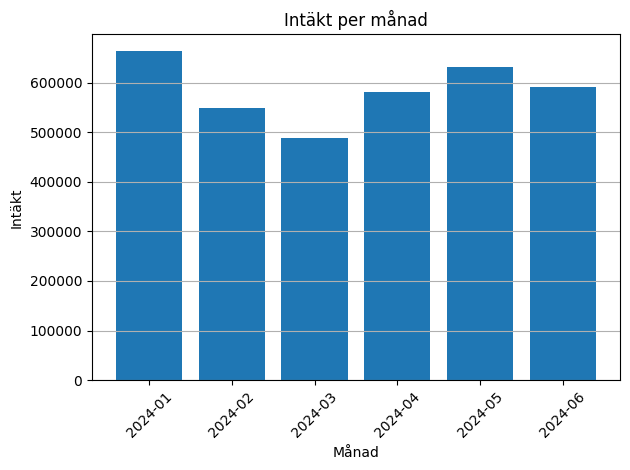

In [2]:
df["month"] = df["date"].dt.to_period("M")
sumclass = df.groupby("month")["revenue"].sum().reset_index()

fig, ax = plt.subplots()
ax.bar(sumclass["month"].astype(str), sumclass["revenue"])      # astype(str) måste finnas för att x -axeln ska funka
ax.set_title("Intäkt per månad")
ax.set_xlabel("Månad")
ax.set_ylabel("Intäkt")
ax.grid(True, axis="y")

plt.setp(ax.get_xticklabels(), rotation=45) 
plt.tight_layout()
plt.show()

In [3]:
df["week"] = df["date"].dt.to_period("W")
revenue_week = df.groupby("week")["revenue"].sum()

# Det är störande att veckorna sorteras inte från högsta till lägsta omsättning, så jag testar:
sorted_weeks = sumclass.sort_values(by="revenue", ascending= False)

print(sorted_weeks)
display(sorted_weeks)

     month    revenue
0  2024-01  664083.32
4  2024-05  632165.16
5  2024-06  590259.89
3  2024-04  580194.83
1  2024-02  548462.03
2  2024-03  487602.00


,month,revenue
0,2024-01,664083.32
4,2024-05,632165.16
5,2024-06,590259.89
3,2024-04,580194.83
1,2024-02,548462.03
2,2024-03,487602.00


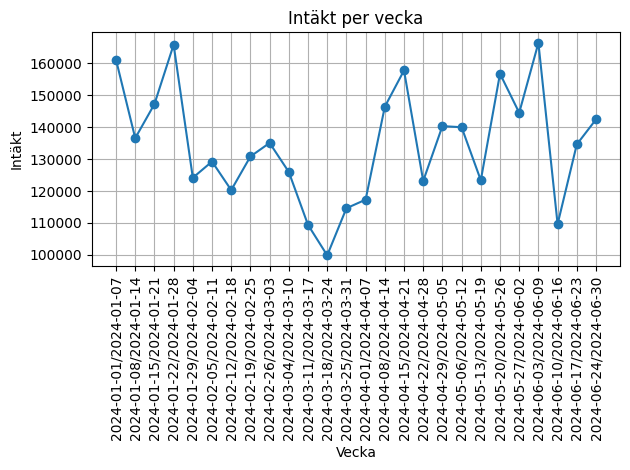

In [4]:
df["week"] = df["date"].dt.to_period("W")
sumclass = df.groupby("week")["revenue"].sum().reset_index()

fig, ax = plt.subplots()
ax.plot(sumclass["week"].astype(str), sumclass["revenue"], marker='o')  # Linjegraf förkortning = plot och "o" visar varje datapunkt
ax.set_title("Intäkt per vecka")
ax.set_xlabel("Vecka")
ax.set_ylabel("Intäkt")
ax.grid(True)

plt.setp(ax.get_xticklabels(), rotation=90) 
plt.tight_layout()
plt.show()

Magdalena - Försäljning per stad

In [5]:
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(".."))
import metrics as M

by_city = M.revenue_per_city(df)
by_cat = M.top_categorys(df)
by_city
by_cat.head(3) # Top 3 kategorier

,category,revenue
0,Electronics,1364228.07
1,Sports,734653.42
2,Clothing,586744.91


<Axes: title={'center': 'Intäkt per kategori'}, xlabel='Kategori', ylabel='Intäkt i miljoner'>

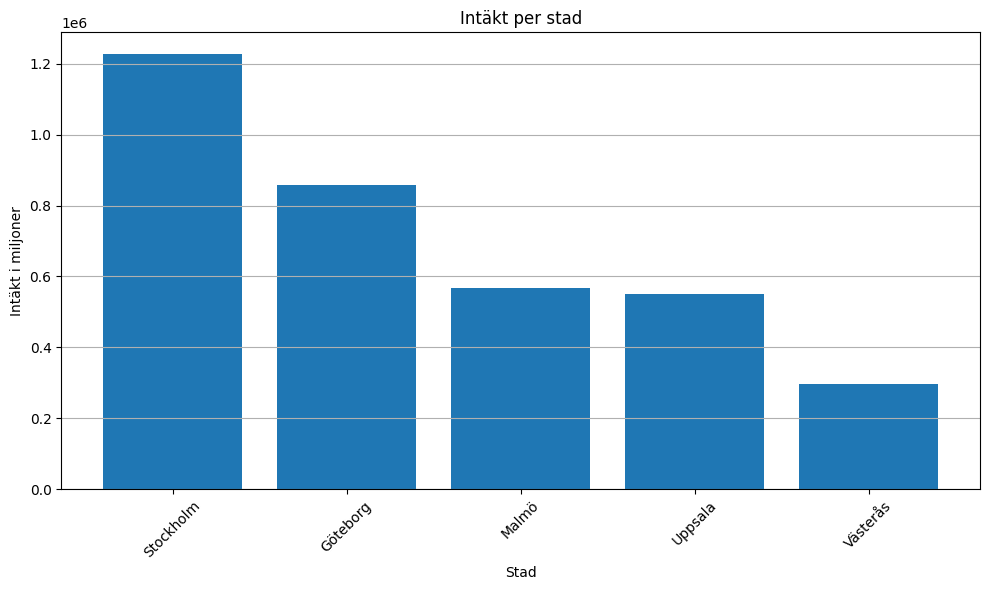

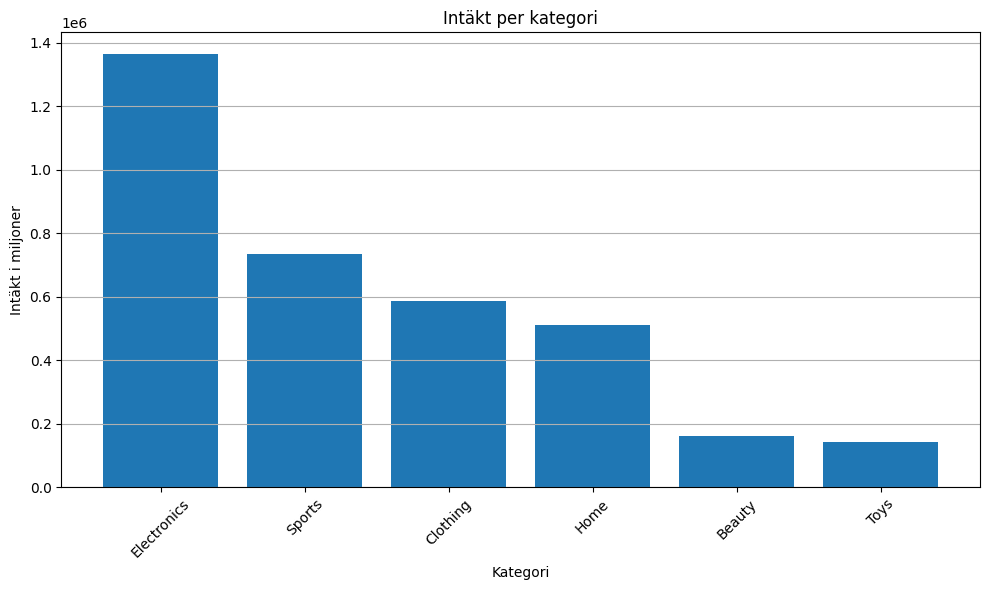

In [6]:
import sys, os
sys.path.append(os.path.abspath('..'))

import viz as V

# Intäkt per stad
fig, ax = plt.subplots(figsize=(10, 6)) # skapar en graf med sepererade staplar för varje stad
V.bar(ax, by_city["city"], by_city["revenue"], "Intäkt per stad", "Stad", "Intäkt i miljoner")

# Intäkt per kategori
fig, ax = plt.subplots(figsize=(10, 6)) # skapar en graf med sepererade staplar för varje stad
V.bar(ax, by_cat["category"], by_cat["revenue"], "Intäkt per kategori", "Kategori", "Intäkt i miljoner")



# Kevin - AOV

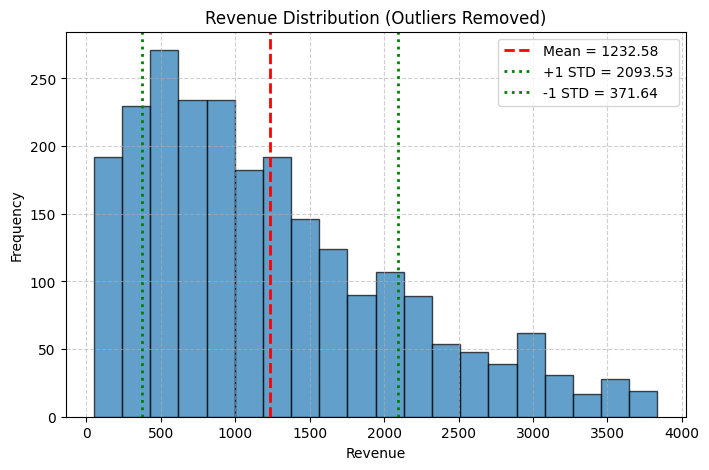

In [7]:
import numpy as np
df = pd.read_csv("../data/ecommerce_sales.csv")

np_orders = np.array(df.revenue)

q1 = np.percentile(np_orders, 25)
q3 = np.percentile(np_orders, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_orders = np_orders[(np_orders >= lower_bound) & (np_orders <= upper_bound)]

std = np.std(filtered_orders)

mean = np.mean(filtered_orders)

plt.figure(figsize=(8, 5))
plt.hist(filtered_orders, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean:.2f}")
plt.axvline(mean + std, color='green', linestyle='dotted', linewidth=2, label=f"+1 STD = {mean + std:.2f}")
plt.axvline(mean - std, color='green', linestyle='dotted', linewidth=2, label=f"-1 STD = {mean - std:.2f}")

plt.title("Revenue Distribution (Outliers Removed)")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Rekomendationer när det gäller intäkter per månad/vecka:

- Tänk på en stark marknadsföring under januari och maj. Dessa månader visar redan höga intäkter och har potential att generera ännu större omsättning.

- Fundera över åtgärder för att motverka nedgången i mars, (kanske kampanjer eller rabatter) för att jämna ut intäktsnivåerna. 

- Fortsätt analysera och jobba med veckoresultaten för att få fram och identifera återkommande veckor med toppar/dalar och anpassa bemanning och lager därefter för maximal effektivitet och besparing. 